J034 Meghna Jayakar Lab 3

11/8/24

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'rice-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2049052%2F3399185%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240818%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240818T162949Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9ebdc7257bb8ccaa087aa2670a3a78bf3dc76ec1ed49815e6e35ba95e2e19c553f8d412888cda3b2a49a4a580c3a831f21d9a22947a3da657fe3a7389278e3dd420a616be462c3b3e7206ed59f8343928dd91be125f391fd38deceb789bdb20e79efd0c90934fd4ffc54d2db5208bdb3f4461c2d466f1457df1a646d99599b5b2f3d9cb06ab6ddec5d945717b85319cec9f92229e433c99414aeddd7f9bb0eb75d3eb87f691443a9819589cb7447780c0c74bfdab9ba0a928eea892f132a3b564470a42a72d324f3b68af334060ea4b19b0f67485982735bc7a3e018100490c5e49674e4ae68210377079a3f6fb3bc6efad312e919dfee078693096a294b7623'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 230059472 bytes downloaded
Downloaded and uncompressed: rice-image-dataset
Data source import complete.


In [3]:
!pip install split-folder

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, ReLU, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import split_folder

In [5]:
labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

img_size = 224
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [6]:
arborio_img = "/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (10008).jpg"
basmati_img = "/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Basmati/basmati (10021).jpg"
ipsala_img = "/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (10310).jpg"
jasmine_img = "/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Jasmine/Jasmine (10000).jpg"
karacadag_img = "/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (1002).jpg"

Function for Plotting the Images

In [7]:
def show(img_path):
    img = plt.imread(img_path)
    print(img.shape)
    plt.imshow(img, cmap = 'gray')
    plt.show()
    return img

(250, 250, 3)


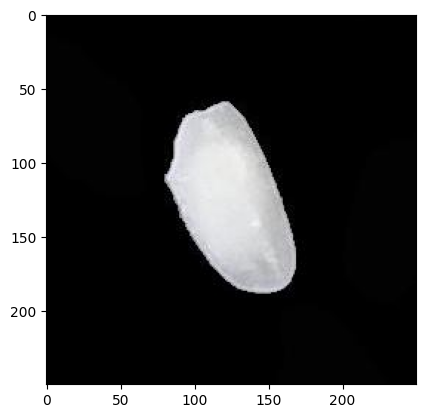

(250, 250, 3)


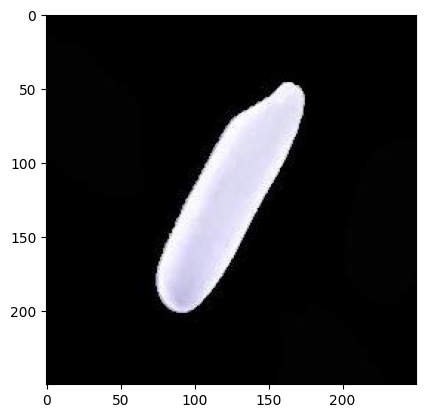

(250, 250, 3)


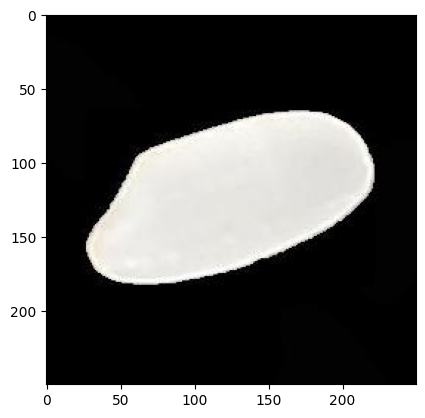

(250, 250, 3)


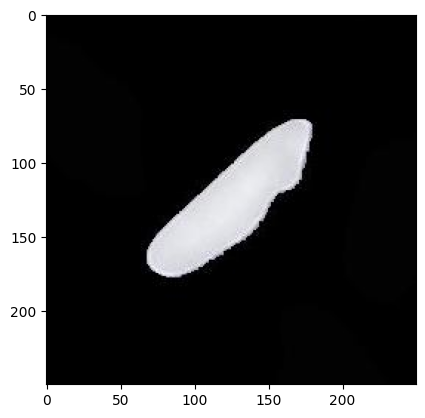

(250, 250, 3)


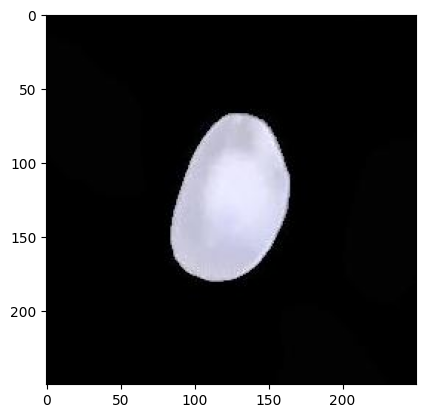

In [8]:
for image in [arborio_img, basmati_img, ipsala_img, jasmine_img, karacadag_img]:
    show(image)

Splitting the data into Train, Validation and Testing Datasets

In [9]:
base_dir = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset'

In [10]:
data_generator = ImageDataGenerator(rescale = 1./255)

split_folder.ratio(base_dir, output = "Rice_Image_Train_Validation_Test", ratio = (0.7, 0.1, 0.2), group_prefix = None)


Copying (10500) of .. train/Ipsala



  0%|          | 0/10500 [00:00<?, ?it/s]


Copying (1500) of .. val/Ipsala



  0%|          | 0/1500 [00:00<?, ?it/s]


Copying (3000) of .. test/Ipsala



  0%|          | 0/3000 [00:00<?, ?it/s]


Copying (10500) of .. train/Karacadag



  0%|          | 0/10500 [00:00<?, ?it/s]


Copying (1500) of .. val/Karacadag



  0%|          | 0/1500 [00:00<?, ?it/s]


Copying (3000) of .. test/Karacadag



  0%|          | 0/3000 [00:00<?, ?it/s]


Copying (10500) of .. train/Jasmine



  0%|          | 0/10500 [00:00<?, ?it/s]


Copying (1500) of .. val/Jasmine



  0%|          | 0/1500 [00:00<?, ?it/s]


Copying (3000) of .. test/Jasmine



  0%|          | 0/3000 [00:00<?, ?it/s]


Copying (10500) of .. train/Arborio



  0%|          | 0/10500 [00:00<?, ?it/s]


Copying (1500) of .. val/Arborio



  0%|          | 0/1500 [00:00<?, ?it/s]


Copying (3000) of .. test/Arborio



  0%|          | 0/3000 [00:00<?, ?it/s]


Copying (10500) of .. train/Basmati



  0%|          | 0/10500 [00:00<?, ?it/s]


Copying (1500) of .. val/Basmati



  0%|          | 0/1500 [00:00<?, ?it/s]


Copying (3000) of .. test/Basmati



  0%|          | 0/3000 [00:00<?, ?it/s]

In [11]:
train_dir = '/content/Rice_Image_Train_Validation_Test/train'
validation_dir = '/content/Rice_Image_Train_Validation_Test/val'
test_dir = '/content/Rice_Image_Train_Validation_Test/test'

In [12]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

In [13]:
train = keras.utils.image_dataset_from_directory(
    directory = train_dir,
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    labels = 'inferred',
    label_mode = 'categorical'
)

validation = keras.utils.image_dataset_from_directory(
    directory = validation_dir,
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    labels = 'inferred',
    label_mode = 'categorical'
)

test = keras.utils.image_dataset_from_directory(
    directory = test_dir,
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    labels = 'inferred',
    label_mode = 'categorical'
)

Found 52500 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.


Creating the CNN Model

In [14]:
model = Sequential([
    keras.Input(shape = (224, 224, 3)),
    Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same', input_shape = (224, 224, 3)),
    BatchNormalization(axis = 1),
    LeakyReLU(),

    Conv2D(filters = 32, kernel_size = (3, 3), strides = 1, padding = 'same'),
    BatchNormalization(axis = 1),
    LeakyReLU(),
    MaxPooling2D(pool_size = (2, 2), strides = 2),

    Conv2D(filters = 64, kernel_size = (3, 3), strides = 1, padding = 'same'),
    BatchNormalization(axis = 1),
    LeakyReLU(),

    Flatten(),
    Dense(units = 256, activation = 'relu'),
    Dense(units = 128, activation = 'relu'),
    Dense(units = 64, activation = 'relu'),
    Dense(units = 5, activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             896 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 32)        │             896 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 64)        │             448 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 802816)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │     205,521,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,593,509 (784.28 MB)

 Trainable params: 205,592,389 (784.27 MB)

 Non-trainable params: 1,120 (4.38 KB)

In [16]:
from keras.utils import plot_model

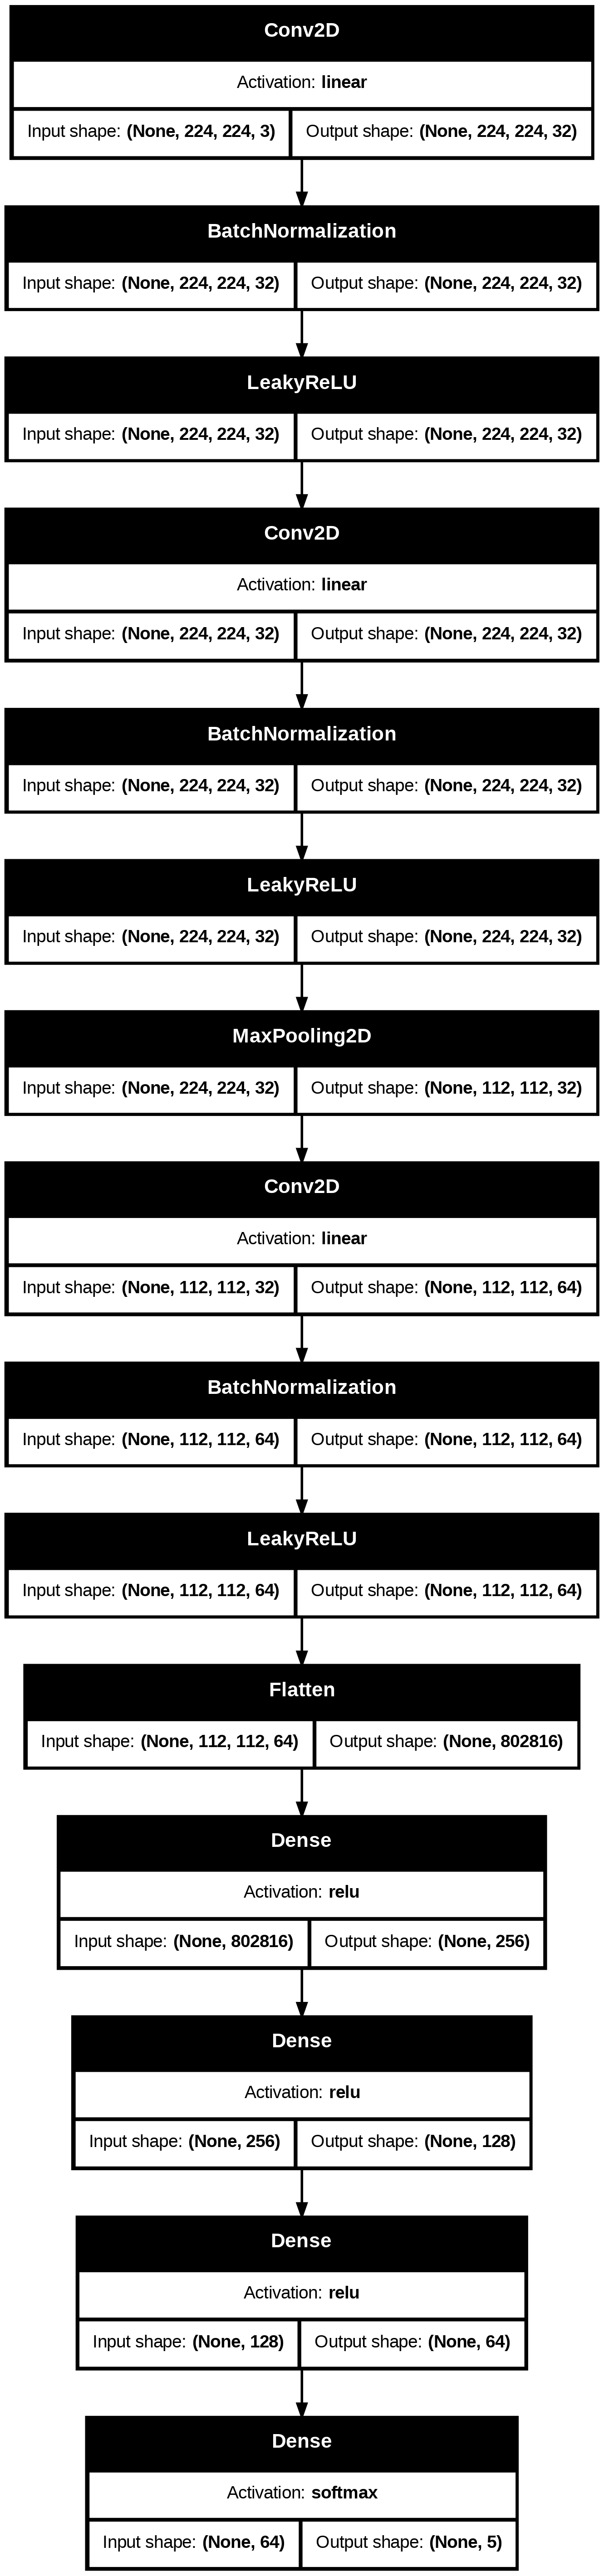

In [17]:
plot_model(model, show_shapes = True, show_layer_activations = True)

In [18]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.CategoricalCrossentropy, metrics = ['accuracy'])

In [19]:
history = model.fit(train, validation_data = validation, epochs = 3)

Epoch 1/3
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 235s 132ms/step - accuracy: 0.8356 - loss: 3.2290 - val_accuracy: 0.9572 - val_loss: 0.4578
Epoch 2/3
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 238s 126ms/step - accuracy: 0.9686 - loss: 0.1043 - val_accuracy: 0.8461 - val_loss: 1.5365
Epoch 3/3
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 262s 126ms/step - accuracy: 0.9753 - loss: 0.0827 - val_accuracy: 0.9869 - val_loss: 0.3387


Plotting model Accuracy and Loss

In [20]:
def plot_accuracy_loss (history):
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("Training vs Validation Accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot Loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("Training vs Validation Loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

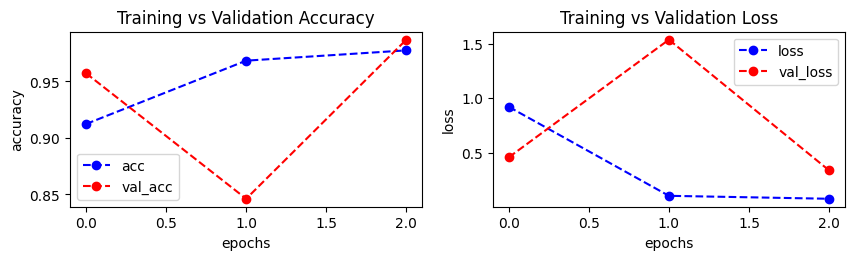

In [21]:
plot_accuracy_loss(history)

Evaluating the Model on Testing Dataset

In [23]:
loss, acc = model.evaluate(test)

469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.9879 - loss: 0.0824
